In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_info.csv').drop('Unnamed: 0',axis=1)

In [3]:
df['dis'] = np.sqrt((df['x_x']-df['x_y'])**2+(df['y_x']-df['y_y'])**2)

In [4]:
df['diff'] = np.abs(df['psi_deg_x']-df['psi_deg_y'])
df['diff_360'] = 360-df['diff']
df['delta'] = df[['diff', 'diff_360']].min(axis=1)

In [5]:
df.columns

Index(['Instance', 'i', 'j', 'TTC', 'x_x', 'y_x', 'vx_x', 'vy_x', 'psi_rad_x',
       'length_x', 'width_x', 'psi_deg_x', 'y_acc_x', 'x_acc_x', 'yaw_rate_x',
       'long_acc_x', 'lat_acc_x', 'r_long_acc_x', 'r_lat_acc_x',
       'r_yaw_rate_x', 'x_y', 'y_y', 'vx_y', 'vy_y', 'psi_rad_y', 'length_y',
       'width_y', 'psi_deg_y', 'y_acc_y', 'x_acc_y', 'yaw_rate_y',
       'long_acc_y', 'lat_acc_y', 'r_long_acc_y', 'r_lat_acc_y',
       'r_yaw_rate_y', 'file', 'y', '2d ttc', 'dis', 'diff', 'diff_360',
       'delta'],
      dtype='object')

In [6]:
data = df[['Instance', 'i', 'j', 'TTC','long_acc_x','r_long_acc_x',
           'yaw_rate_x','long_acc_y','r_long_acc_y','yaw_rate_y','delta','y','dis','file']]
data = data.dropna(subset=['long_acc_x','r_long_acc_x','yaw_rate_x','long_acc_y','r_long_acc_y','yaw_rate_y','delta','y'])

In [7]:
data4 = data.groupby(['i','j','file']).head(4)#11480

In [8]:
data4 = data.groupby(['i','j','file']).head(4)
train_test = pd.DataFrame(columns=['i_long_acc_1','i_long_acc_2','i_long_acc_3','i_long_acc_4',
                                  'j_long_acc_1','j_long_acc_2','j_long_acc_3','j_long_acc_4',
                                  'i_r_long_acc_1','i_r_long_acc_2','i_r_long_acc_3','i_r_long_acc_4',
                                  'j_r_long_acc_1','j_r_long_acc_2','j_r_long_acc_3','j_r_long_acc_4',
                                  'yaw_rate_x_1','yaw_rate_x_2','yaw_rate_x_3','yaw_rate_x_4',
                                  'yaw_rate_y_1','yaw_rate_y_2','yaw_rate_y_3','yaw_rate_y_4',
                                  'delta_1','delta_2','delta_3','delta_4',
                                  'dis_1','dis_2','dis_3','dis_4',
                                  'y','i','j','file'])
for i in range(3620):
    data0 = data4.iloc[4*i:4*i+4]
    train_test.loc[i] = [data0.iloc[0]['long_acc_x'],data0.iloc[1]['long_acc_x'],data0.iloc[2]['long_acc_x'],data0.iloc[3]['long_acc_x'],
                         data0.iloc[0]['long_acc_y'],data0.iloc[1]['long_acc_y'],data0.iloc[2]['long_acc_y'],data0.iloc[3]['long_acc_y'],
                         data0.iloc[0]['r_long_acc_x'],data0.iloc[1]['r_long_acc_x'],data0.iloc[2]['r_long_acc_x'],data0.iloc[3]['r_long_acc_x'],
                         data0.iloc[0]['r_long_acc_y'],data0.iloc[1]['r_long_acc_y'],data0.iloc[2]['r_long_acc_y'],data0.iloc[3]['r_long_acc_y'],
                         data0.iloc[0]['yaw_rate_x'],data0.iloc[1]['yaw_rate_x'],data0.iloc[2]['yaw_rate_x'],data0.iloc[3]['yaw_rate_x'],
                         data0.iloc[0]['yaw_rate_y'],data0.iloc[1]['yaw_rate_y'],data0.iloc[2]['yaw_rate_y'],data0.iloc[3]['yaw_rate_y'],
                         data0.iloc[0]['delta'],data0.iloc[1]['delta'],data0.iloc[2]['delta'],data0.iloc[3]['delta'],
                         data0.iloc[0]['dis'],data0.iloc[1]['dis'],data0.iloc[2]['dis'],data0.iloc[3]['dis'],
                         data0.iloc[0]['y'],data0.iloc[0]['i'],data0.iloc[0]['j'],data0.iloc[0]['file']]

In [9]:
X = train_test[['i_long_acc_1', 'i_long_acc_2', 'i_long_acc_3', 'i_long_acc_4',
       'j_long_acc_1', 'j_long_acc_2', 'j_long_acc_3', 'j_long_acc_4',
       'i_r_long_acc_1', 'i_r_long_acc_2', 'i_r_long_acc_3', 'i_r_long_acc_4',
       'j_r_long_acc_1', 'j_r_long_acc_2', 'j_r_long_acc_3', 'j_r_long_acc_4',
       'yaw_rate_x_1', 'yaw_rate_x_2', 'yaw_rate_x_3', 'yaw_rate_x_4',
       'yaw_rate_y_1', 'yaw_rate_y_2', 'yaw_rate_y_3', 'yaw_rate_y_4',
       'delta_1', 'delta_2', 'delta_3', 'delta_4', 'dis_1', 'dis_2', 'dis_3',
       'dis_4']]
y = train_test['y']

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [13]:
scores = []
scores0 = []
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k,max_depth = 9)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_train)
    scores0.append(accuracy_score(y_train, y_pred))
    y_pred = rfc.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
# plt.plot(range(1, 200), scores)
# plt.plot(range(1, 200), scores[0])
# plt.xlabel('Value of n_estimators for Random Forest Classifier')
# plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Accuracy')

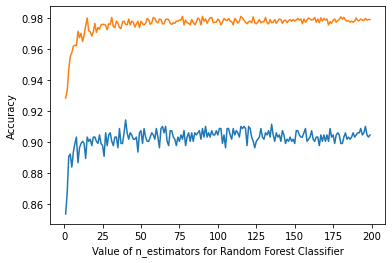

In [20]:
plt.plot(range(1, 200), scores)
plt.plot(range(1, 200), scores0)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Accuracy')

In [15]:
np.argmax(scores)

39

In [16]:
rfc = RandomForestClassifier(n_estimators = np.argmax(scores),max_depth = 9)
rfc.fit(X_train, y_train)
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

In [17]:
train_outcome = pd.DataFrame()
train_outcome['y'] = y_train
train_outcome['y_hat'] = y_pred_train
test_outcome = pd.DataFrame()
test_outcome['y'] = y_test
test_outcome['y_hat'] = y_pred_test

In [18]:
print(len(train_outcome[(train_outcome['y']==1)&(train_outcome['y_hat']==1)]),
len(train_outcome[(train_outcome['y']==1)&(train_outcome['y_hat']==0)]),
len(train_outcome[(train_outcome['y']==0)&(train_outcome['y_hat']==1)]),
len(train_outcome[(train_outcome['y']==0)&(train_outcome['y_hat']==0)]))

813 40 33 2010


In [19]:
print(len(test_outcome[(test_outcome['y']==1)&(test_outcome['y_hat']==1)]),
len(test_outcome[(test_outcome['y']==1)&(test_outcome['y_hat']==0)]),
len(test_outcome[(test_outcome['y']==0)&(test_outcome['y_hat']==1)]),
len(test_outcome[(test_outcome['y']==0)&(test_outcome['y_hat']==0)]))

197 39 30 458
